<a href="https://colab.research.google.com/github/mazoSant/Personal_proyects/blob/master/correlacion_negativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/db
API_NY.GDP.MKTP.KD.ZG_DS2_es_csv_v2_3867782.csv  Meteorite_Landings.csv
cars.csv					 pib.csv
covid_19_data.csv				 poblacion.csv
london_merged.csv				 test.csv


In [ ]:
df=pd.read_csv('cars.csv')
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [ ]:
df['ones']=1
df.shape

(38531, 31)

In [ ]:
df.groupby('manufacturer_name')['price_usd'].median().sort_values(ascending=False)

manufacturer_name
Porsche          15000.000
Lexus            14200.000
Jaguar           13400.000
Buick            12300.000
Land Rover       12200.000
Acura            12024.500
Infiniti         11999.500
Mini             11975.000
Skoda            10900.000
Cadillac          9100.000
Jeep              8450.000
Chevrolet         8300.000
Lifan             8000.000
Iveco             8000.000
LADA              7853.065
Toyota            7812.550
SsangYong         7500.000
Kia               7300.000
Volvo             7300.000
Hyundai           7000.000
BMW               6750.000
Mercedes-Benz     6700.000
Lincoln           6675.000
Subaru            6650.000
Great Wall        6200.000
Honda             5950.000
Geely             5800.000
Volkswagen        5500.000
Audi              5330.790
Suzuki            4899.000
Pontiac           4750.000
Nissan            4500.000
Dacia             4000.000
Chrysler          4000.000
Saab              3800.000
Dodge             3793.990
Peugeot   

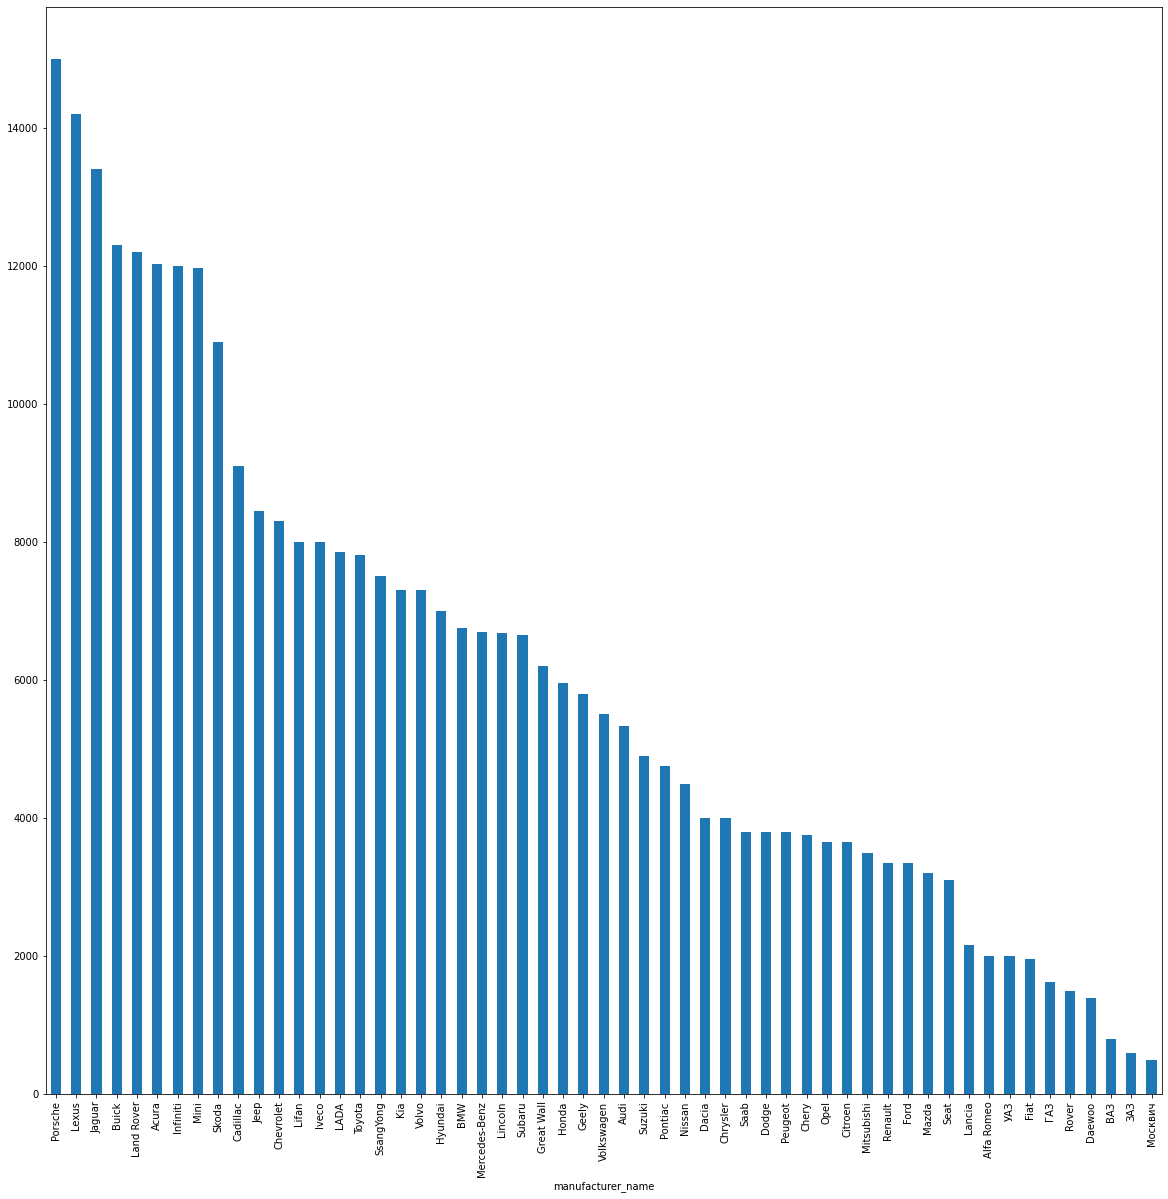

In [ ]:
df.groupby('manufacturer_name')['price_usd'].median().sort_values(ascending=False).plot(kind='bar',figsize=(20,20))


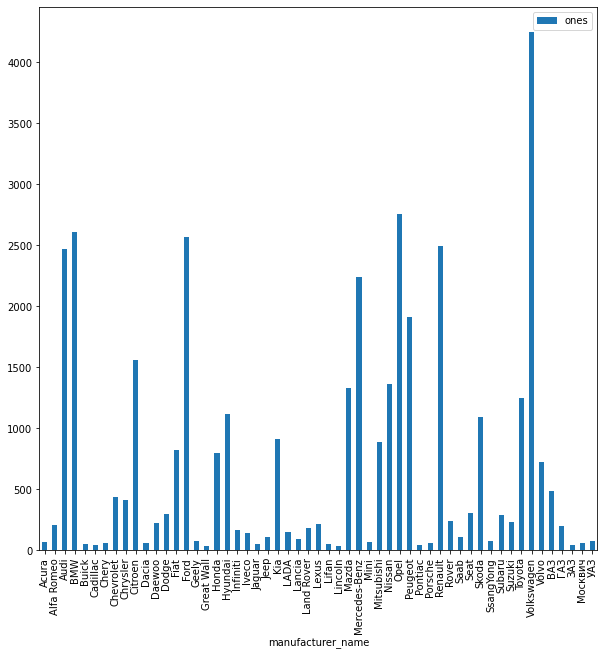

In [ ]:
df.groupby('manufacturer_name')[['ones']].sum().plot(kind='bar',figsize=(10,10))

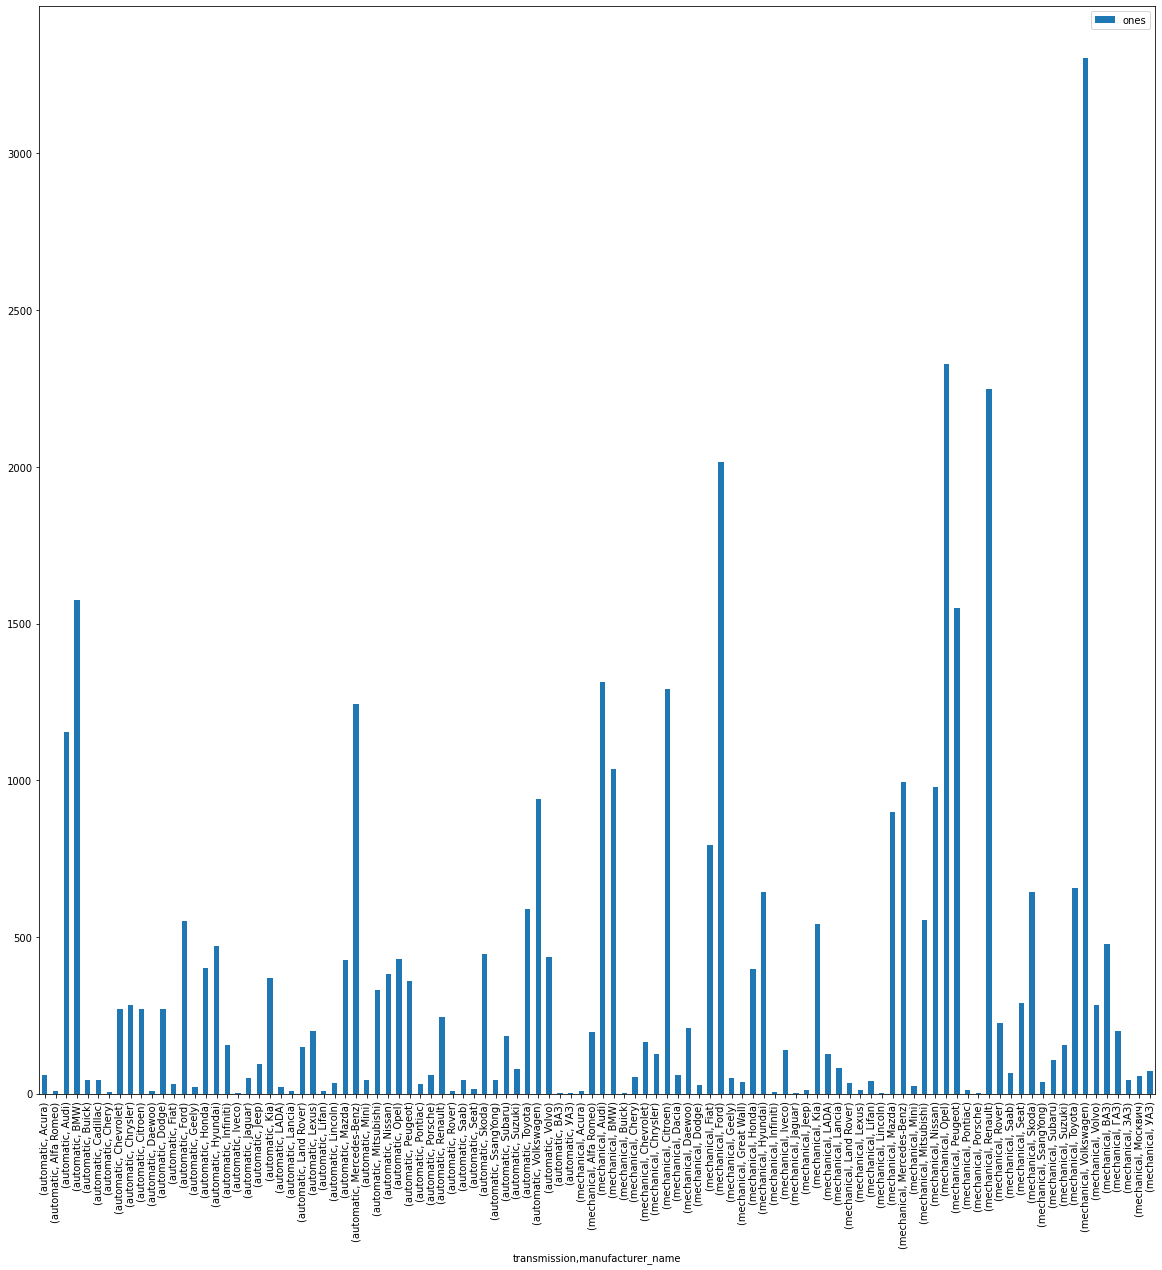

In [ ]:
df.groupby(['transmission','manufacturer_name'])[['ones']].sum().plot(kind='bar',figsize=(20,20))

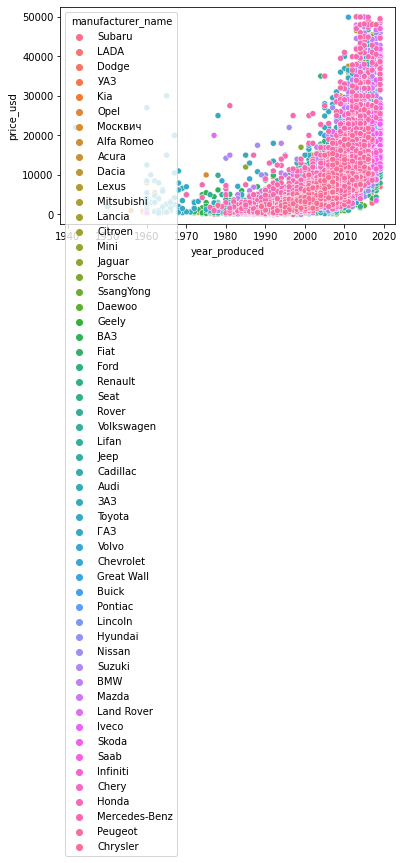

In [ ]:
sns.scatterplot(data=df,x='year_produced',y='price_usd',hue='manufacturer_name')

In [ ]:
df.groupby(['manufacturer_name','price_usd'])[['ones']].sum()

ones
manufacturer_name price_usd      
Acura             2350.0        1
                  2750.0        1
                  3400.0        1
                  3850.0        1
                  4200.0        1
...                           ...
УАЗ               9000.0        2
                  10400.0       1
                  10500.0       1
                  12800.0       1
                  15000.0       1

[12230 rows x 1 columns]

In [ ]:
idx_filter=df['manufacturer_name'].isin(['Volkswagen'])
idx_filter

0        False
1        False
2        False
3        False
4        False
         ...  
38526    False
38527    False
38528    False
38529    False
38530    False
Name: manufacturer_name, Length: 38531, dtype: bool

In [ ]:
idx_filter=df['manufacturer_name'].isin(['Lexus'])
df_lexus=df[idx_filter]
df_lexus

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,ones
4866,Lexus,ES,automatic,black,180252,2007,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,27,1
4867,Lexus,RX,automatic,black,150000,2010,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,52,1
4868,Lexus,RX,automatic,white,43436,2017,gasoline,False,gasoline,2.0,...,False,True,True,True,True,True,True,True,26,1
4869,Lexus,ES,automatic,black,415000,2008,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,3,1
4870,Lexus,RX,automatic,black,230973,2009,hybrid-petrol,False,gasoline,3.5,...,True,True,True,True,False,True,True,True,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,Lexus,LS,automatic,silver,250000,2002,gas,True,gasoline,4.3,...,True,True,True,True,True,False,True,True,232,1
5075,Lexus,RX,automatic,silver,193121,2009,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,233,1
5076,Lexus,LS,automatic,black,170000,2008,hybrid-petrol,False,gasoline,5.0,...,True,True,True,True,True,True,True,True,240,1
5077,Lexus,RX,automatic,other,336000,2006,gasoline,False,gasoline,3.3,...,True,False,True,True,False,False,True,True,298,1


In [ ]:
df_lexus['year_produced'].min()

1991

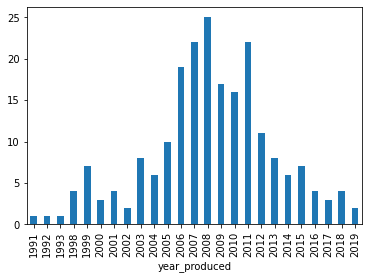

In [ ]:
df_lexus.groupby('year_produced')['ones'].sum().plot(kind='bar')

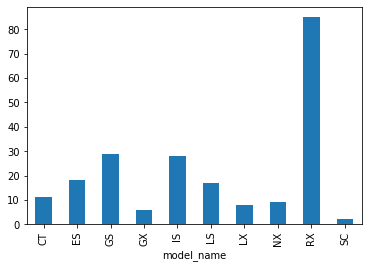

In [ ]:
df_lexus.groupby('model_name')['ones'].sum().plot(kind='bar')

In [ ]:
idx_filter_uno=df_lexus['model_name'].isin(['RX'])
idx_filter_uno

4866    False
4867     True
4868     True
4869    False
4870     True
        ...  
5074    False
5075     True
5076    False
5077     True
5078     True
Name: model_name, Length: 213, dtype: bool

In [ ]:
df_lexus_dos=df_lexus[idx_filter_uno]
df_lexus_dos

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,ones
4867,Lexus,RX,automatic,black,150000,2010,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,52,1
4868,Lexus,RX,automatic,white,43436,2017,gasoline,False,gasoline,2.0,...,False,True,True,True,True,True,True,True,26,1
4870,Lexus,RX,automatic,black,230973,2009,hybrid-petrol,False,gasoline,3.5,...,True,True,True,True,False,True,True,True,29,1
4871,Lexus,RX,automatic,silver,39855,2016,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,22,1
4875,Lexus,RX,automatic,grey,174260,2005,hybrid-petrol,False,gasoline,3.3,...,True,True,True,True,False,False,False,True,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,Lexus,RX,automatic,black,220000,2009,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,143,1
5071,Lexus,RX,automatic,white,86000,2013,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,158,1
5075,Lexus,RX,automatic,silver,193121,2009,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,233,1
5077,Lexus,RX,automatic,other,336000,2006,gasoline,False,gasoline,3.3,...,True,False,True,True,False,False,True,True,298,1


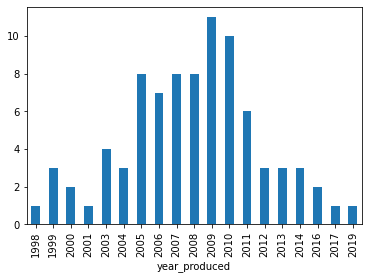

In [ ]:
df_lexus_dos.groupby('year_produced')['ones'].sum().plot(kind='bar')

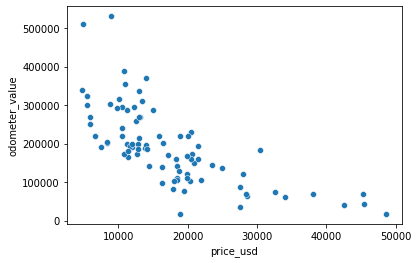

In [ ]:
sns.scatterplot(data=df_lexus_dos,x='price_usd',y='odometer_value')

In [ ]:
from pandas.core.frame import DataFrame
data_frame2=DataFrame(data=df_lexus_dos)
data_frame2
print('Correlación Pearson: ', data_frame2['price_usd'].corr(data_frame2['odometer_value'], method='pearson'))

Correlación Pearson:  -0.7040413343120908


In [ ]:
df_lexus_dos.dtypes
idx_filter_dos=df_lexus_dos['year_produced'].isin([2009])
idx_filter_dos

4867    False
4868    False
4870     True
4871    False
4875    False
        ...  
5067     True
5071    False
5075     True
5077    False
5078    False
Name: year_produced, Length: 85, dtype: bool

In [ ]:
df_lexus_tres=df_lexus_dos[idx_filter_dos]
df_lexus_tres

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,ones
4870,Lexus,RX,automatic,black,230973,2009,hybrid-petrol,False,gasoline,3.5,...,True,True,True,True,False,True,True,True,29,1
4916,Lexus,RX,automatic,black,142000,2009,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,64,1
4918,Lexus,RX,automatic,black,159325,2009,hybrid-petrol,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,23,1
4933,Lexus,RX,automatic,black,170000,2009,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,27,1
4943,Lexus,RX,automatic,blue,110000,2009,gasoline,False,gasoline,3.5,...,False,True,True,True,False,True,False,True,46,1
4967,Lexus,RX,automatic,grey,160000,2009,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,91,1
5011,Lexus,RX,automatic,silver,104607,2009,gasoline,False,gasoline,3.5,...,True,False,True,True,False,False,True,True,778,1
5022,Lexus,RX,automatic,red,120000,2009,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,93,1
5063,Lexus,RX,automatic,white,138404,2009,gasoline,False,gasoline,3.5,...,False,False,True,True,False,True,True,True,118,1
5067,Lexus,RX,automatic,black,220000,2009,gasoline,False,gasoline,3.5,...,True,True,True,True,True,True,True,True,143,1


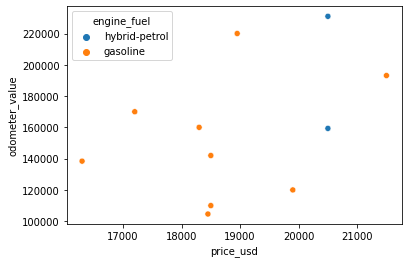

In [ ]:
sns.scatterplot(data=df_lexus_tres,x='price_usd',y='odometer_value',hue='engine_fuel')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


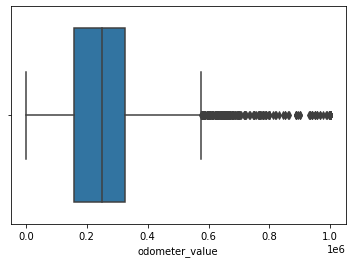

In [ ]:
sns.boxplot(df['odometer_value'])

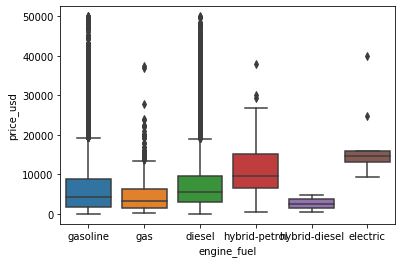

In [ ]:
sns.boxplot(x='engine_fuel',y='price_usd',data=df)

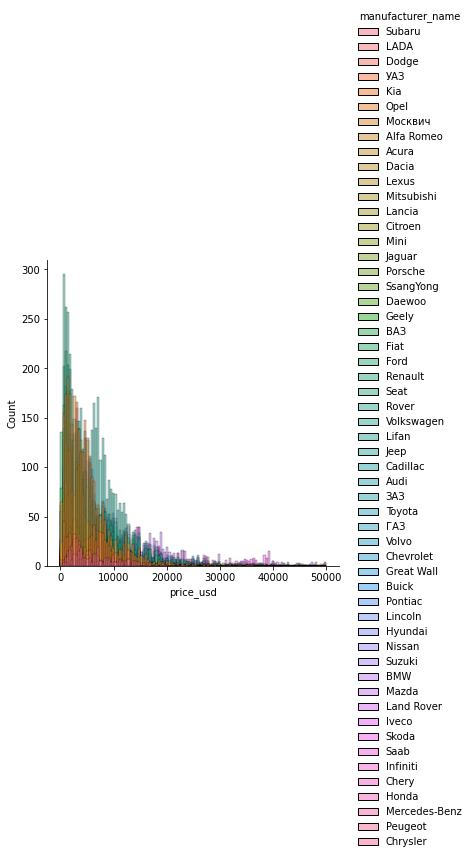

In [ ]:
sns.displot(df,x='price_usd',hue='manufacturer_name')